# Introduction

## Problem Description
The 2D Poisson equation, appears in various fields of applied mathematics, engineering, and physics. Such fields are electrodynamics, fluid mechanics, diffusion, and quantum mechanics. This equation is given by: 

\begin{equation}
-\Delta u = f(x,y) \nonumber
\end{equation}

where $\Delta u = \nabla^{2} u = \frac{\partial^{2}u}{\partial x^{2}} + \frac{\partial^{2}u}{\partial y^{2}}, f(x,y)$ is a given fucntion and when $f(x,y) = 0,$ it is the homogeneous Laplacian equation. The function $f(x,y)$ is defined as: 

\begin{equation} f(x,y) = 100(x^2 + y^2) \nonumber \end{equation}

Information that is pertintent to solving the problem is the domain $\Omega$ that we are solving the equation on, and the Dirichlet boundary conditions to solve from. This equation is also an elliptical partial differential equation, based off of all second order linear PDEs taking the form of 
\begin {equation} Au_{xx} + 2Bu_{xy} + Cu_{yy} + Du_{x} + Eu_{y} + Fu + G = 0 \nonumber
\end{equation}
 And if the coefficients of each term lead to $B^2 -AC < 0$, the equation is elliptical. $A$ is the coefficient of $u_{xx}$, $B$ is the coefficient of $u_{xy}$, and $C$ is the coefficient of $u_{yy}$. Since the coefficient of the $u_{xy}$ term is zero, and the coefficients of $A$ and $B$ are 1, it is true that $B^2 -AC < 0$, where $ -1 < 0$. Thus, this is an elliptical PDE.

**Domain:** The domain $\Omega$ can be consticted to two boundaries $(x,y) \in \Omega = (0,1) \times (0,1)$ such that $x$ and $y$ are within the domains of $0 \leq x \leq 1$ and $0 \leq y \leq 1$.

**Boundary Conditions:** Since a domain $\Omega$ is defined, boundary conditions on that square boundary need to be defined so that a numerical solution for this partial differential equation (PDE) can be solved. These boundary conditions correspond to the following functions on the borders of the domain $\Omega$:

\clearpage
 
\begin{equation} u(x,0)=\sin(2\pi x), \ \ \ \ \ 0 \leq x \leq 1, \text{ lower border}, \nonumber \end{equation}

\begin{equation} u(x,1)=\sin(2\pi x), \ \ \ \ \ 0 \leq x \leq 1, \text{ upper border}, \nonumber \end{equation}

\begin{equation} u(0,y)=2\sin(2\pi y), \ \ \ \ \ 0 \leq y \leq 1, \text{ left border},\nonumber \end{equation}

\begin{equation} u(1,y)=2\sin(2\pi y), \ \ \ \ \ 0 \leq y \leq 1, \text{ right border}. \nonumber \end{equation}







## How can this problem be solved?

Since this problem takes the form of a partial differential equation, it's much more dififcult to solve than an ordinary differential equation (ODE). However, the finite difference method can be used to solve this PDE numerically. There are a few steps that need to be taken. First the domain need to be discreted into a grid of equidistant points, then the boundary conditions will be defined along that domain, then the finite difference method will be used to determine a matrix equation representing a system of equations to find the value of the fucntion $u(x,y)$ at whatever point $(x,y)$. After those values for the discretized points are found, the solution for the homogeneous PDE can be graphed and error analysis can be determined based upon the Dirichlet boundary conditions. 

# Numerical Analysis using Python
To begin, some necessary python libraries must be imported to ensure that the numerical solutions can be graphed and also there are libraries to compute various facets of numerical linear algebra.

In [82]:
# Necessary Libraries
import numpy as np 
import math

#plotting funcitons
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML
from mpl_toolkits.mplot3d import axes3d

## Discretizing the Domain $\Omega$

The region $\Omega = (0,1) \times (0,1)$ needs to be descretized into a grid of points. This can be done in a number $N$ steps in the $x$ and $y$ directions. This finite difference can be determined by getting the difference between the two boundaries of the domain and diving it by the number of points desired in both directions. Since the boundaries of x and y are the same, the finite difference should be the same in both directions.

\begin{equation} h = \frac{1-0}{N} = \frac{1}{N}  \nonumber \end{equation}
Such that x, and y can be plotted as these two functions where $i$ and $j$ are which number of point until $N$ and $h$ is the distance between the equidistant points.

\begin{equation}x[i]=0+ih, \ \ \  i=0,1,...,N, \nonumber \end{equation}

\begin{equation}x[j]=0+jh, \ \ \  j=0,1,...,N,\nonumber \end{equation}


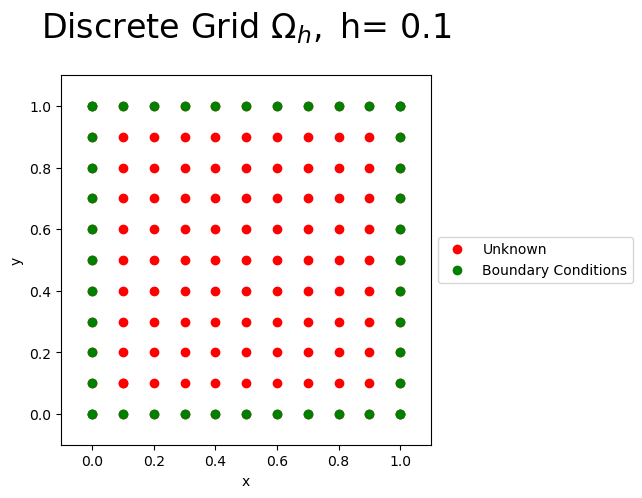

In [83]:
N=10
h=1/N
x=np.arange(0,1.0001,h)
y=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
plt.plot(x[1],y[1],'ro',label='Unknown');
plt.plot(X,Y,'ro');
plt.plot(np.ones(N+1),y,'go',label='Boundary Conditions');
plt.plot(np.zeros(N+1),y,'go');
plt.plot(x,np.zeros(N+1),'go');
plt.plot(x, np.ones(N+1),'go');
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_{h},$ h= %s'%(h),fontsize=24,y=1.08)
plt.show()

## Defining Dirichlet Boundary Conditions

Partial Differential Equations that don't involve time derivatives often occur in nature and typically don't have initial conditions and the only thing that is given are boundary conditions, leading to those types of problems being called boundary-value problems (BVPs).

A boundary type that applies to this specific problem is the Dirichlet boundary condition, where a function $u(x,y)$ is defined on the boundery $d\Omega$. Dirichlet conditions just give the value of a function on a boundary. Another form of a boundary condition is the Neumann boundary condition where the boundary condition is usually the outward normal derivative (which is proprotional to the inward flux) on the boundary. The Neumann condition is usually applied for electrostatic problems and heat flow. 

In this case, the Dirichlet conditions are defined as is:

\begin{equation} u_{i0} = u[i,0] = sin(2\pi x[i]), \text{ for } i = 0,\dots,N, \text{lower}, \nonumber \end{equation}

\begin{equation} u_{iN} = u[i,N] = sin(2\pi x[i]), \text{ for } i = 0,\dots,N, \text{upper}, \nonumber \end{equation}

\begin{equation} u_{0j} = u[0,j] = 2sin(2\pi y[j]), \text{ for } j = 0,\dots,N, \text{left}, \nonumber \end{equation}

\begin{equation} u_{Nj} = u[N,j] = 2sin(2\pi x[j]), \text{ for } j = 0,\dots,N, \text{right}, \nonumber \end{equation}

Using pyplot, and the initialization of the points ealier in the mesh grid, the boundary conditions of $u(x,y)$ can be plotted on a three dimensonal grid, which is depicted below.

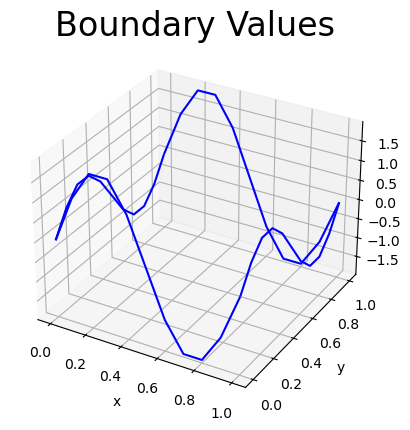

In [84]:
u = np.zeros((N+1, N+1))

# Horizontal boundaries such on the top and bottom of the boundary conditions
for i in range (0,N):
    u[i,0]=np.sin(2*np.pi*x[i])
    u[i,N]=np.sin(2*np.pi*x[i])
# Vertical Boundaries such on the left and right of the boundary conditions
for j in range (0,N):
    u[0,j]=2*np.sin(2*np.pi*y[j])
    u[N,j]=2*np.sin(2*np.pi*y[j])
    
#Now this information needs to be plotted 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')    
#This wireframe is created by the values X and Y that are defined in the mesh
ax.plot_wireframe(X, Y, u, color='b', rstride = N, cstride=N)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.title(r'Boundary Values', fontsize = 24, y =1.08)
plt.show()

u2 = u

## Finite Difference Expansion

The equation that needs to be solved is:

\begin{equation} -(u_{xx} + u_{yy}) = f(x,y) \nonumber \end{equation}

Using the limit definition of the derivative, an expression for the second derivative of a function can be expressed in terms of h.

\begin{equation} \delta^{2}_{x} = \frac{1}{h^2}(u(x+h, y) - 2u(x,y) + u(x-h,y)) \nonumber \end{equation}

\begin{equation} \delta^{2}_{y} = \frac{1}{h^2}(u(x, y+h) - 2u(x,y) + u(x,y-h)) \nonumber \end{equation}

Now, these can be expressed in terms of the value of u at discrete point $(i,j)$ because we have a small sample size and h is the discrete distance between each point on our finite difference grid:

\begin{equation} \delta^{2}_{x} = \frac{1}{h^2}(u_{i+1j} - 2u_{ij} + u_{i-1j}) \nonumber \end{equation}

\begin{equation} \delta^{2}_{y} = \frac{1}{h^2}(u_{ij+1} - 2u_{ij} + u_{ij-1}) \nonumber \end{equation}

$u_{ij}$ is the approximation of $u(x,y)$ at $x_i$ and $y_j$. The Poisson Difference Equation can be expressed like this now based off of previous equations. 

\begin{equation} -(u_{i-1j} + u_{ij-1} -4u_{ij} +u_{ij+1} + u_{i+1j} ) = h^2f_{ij} \nonumber \end{equation}

Equations of this form can be derived for each point $u_{ij}$ within the domain $\Omega$ and a system of equations can be formed in a system of $(N-1) \times (N-1)$ equations that can be arranged into a matrix form.

\begin{equation} A\mathbf{u} = \mathbf{r} \nonumber \end{equation}

where $A$ is an $(N-1)^2\times(N-1)^2$  matrix made up of the following block tridiagonal structure

\begin{equation}\left(\begin{array}{ccccccc}
T&I&0&0&.&.&.\\
I&T&I&0&0&.&.\\
.&.&.&.&.&.&.\\
.&.&.&0&I&T&I\\
.&.&.&.&0&I&T\\ \end{array}\right) \nonumber \end{equation}

where $I$ denotes an $N-1 \times N-1$ identity matrix and $T$ is the tridiagonal matrix of the form:

\begin{equation} T=\left(\begin{array}{ccccccc}
-4&1&0&0&.&.&.\\
1&-4&1&0&0&.&.\\
.&.&.&.&.&.&.\\
.&.&.&0&1&-4&1\\
.&.&.&.&0&1&-4\\ \end{array}\right) \nonumber \end{equation}

In human terms, it each value $u_{ij}$ term draws from it's four adjacent surrounding points using and uses the finite difference formula with a defined distance $h$ between the points. Then that is equated to the function $f(x,y)$. The compliment of each point takes the form of this, drawing from a point above, to the left, to the right, and below the point $u_{ij}$, this compliment is then copied through the diagonal of the matrix $A$  where $-4$ is the center.

\begin{equation} \left(\begin{array}{ccccccc}
.&1&.\\
1&-4&1\\
.&1&.\\
\end{array}\right) \nonumber \end{equation}

The intialization of this matrix is shown below through python code.

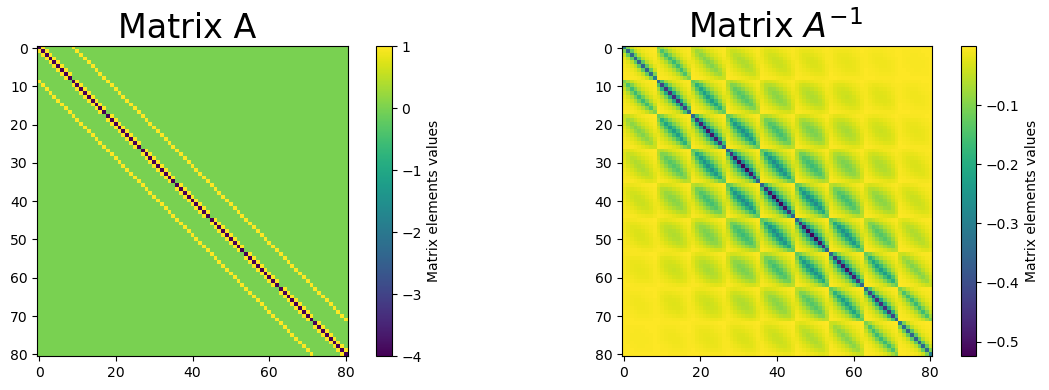

In [85]:
# A is an (N-1)^2 x (N-1)^2 matrix so that matrix A is initialized.
N2 = (N-1) * (N-1)
A = np.zeros((N2,N2))

# Diagonal
for i in range (0, N-1):
    for j in range (0, N-1):
        A[i+(N-1)*j, i+(N-1)*j] =-4

# Lower Diagonal
for i in range (1, N-1):
    for j in range (0, N-1):
        A[i+(N-1)*j, i+(N-1)*j -1]=1
        
# Upper Diagonal
for i in range (0, N-2):
    for j in range (0, N-1):
        A[i+(N-1)*j, i+(N-1)*j+1] =1
        
# Lower Identity Matrix
for i in range (0, N-1):
    for j in range (1, N-1):
        A[i+(N-1)*j, i+(N-1)*(j-1)] =1
        
# Upper Identity Matrix 
for i in range (0, N-1):
    for j in range (0, N-2):
        A[i+(N-1)*j, i+(N-1)*(j+1)] =1
        
Ainv=np.linalg.inv(A)   
fig = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(A,interpolation='none')
clb=plt.colorbar()
clb.set_label('Matrix elements values')
plt.title('Matrix A ',fontsize=24)
plt.subplot(122)
plt.imshow(Ainv,interpolation='none')
clb=plt.colorbar()
clb.set_label('Matrix elements values')
plt.title(r'Matrix $A^{-1}$ ',fontsize=24)

fig.tight_layout()
plt.show()

## Defining Vectors $\textbf{u}$ and $\textbf{r}$
Now, the vector $\textbf{u}$ is a column vector that is made up of $N-1$ subvectors $\textbf{u}_j$ of N-1 of the form

\begin{equation}\mathbf{u}_j=\left(\begin{array}{c}
u_{1j}\\
u_{2j}\\
.\\
.\\
u_{N-2j}\\
u_{N-1j}\\
\end{array}\right) \nonumber \end{equation}

These subvectors are added together so that there is a column vector of only the points $u_{ij}$ for all points inside the domain $\Omega$.

Also, the solution vector $\textbf{r}$ of length $(N-1) \times (N-1)$ is made up of $(N-1)$ subvectors of form $\textbf{r}_{j} = -h^2\textbf{f}_{j} -\textbf{bx}_{j} - \textbf{by}_{j}$. The $\textbf{b}$ vectors are the boundary conditions on the left and right. Vector $\textbf{bx}_{j}$ is the vector of left and right boundary conditions on a vertical axis: 

\begin{equation}\mathbf{bx}_j =\left(\begin{array}{c}
u_{0j}\\
0\\
.\\
.\\
0\\
u_{Nj} \end{array}\right), \nonumber \end{equation}

Also, $\textbf{by}_1$ can be the lower boundary for $j = 1$,

\begin{equation}\mathbf{by}_1 =\left(\begin{array}{c}
u_{10}\\
u_{20}\\
.\\
.\\
u_{(N-2)0}\\
u_{(N-1)0} \end{array}\right), \nonumber \end{equation}

The upper boundary can be where $j = N-1$

\begin{equation}\mathbf{by}_{N-1} =\left(\begin{array}{c}
u_{1N}\\
u_{2N}\\
.\\
.\\
u_{(N-2)N}\\
u_{(N-1)N} \end{array}\right), \nonumber \end{equation}

Now the boundary conditions are obviously zero when $i = 2, \dots, N-2$ and $j= 2, \dots, N-2$
 
\begin{equation} \mathbf{bx}_i, \mathbf{by}_j = 0  \nonumber \end{equation}

Also for the function $\textbf{f}_{j}$, for the Poisson equation,

\begin{equation}\mathbf{f}_j =100\left(\begin{array}{c}
x_1^2+y_j^2\\
x_2^2+y_j^2\\
.\\
.\\
x_{N-2}^2+y_j^2\\
x_{N-1}^2+y_j^2 \end{array}\right) \nonumber \end{equation}
for $j=1,...,N-1$. 

For the Laplacian equation,

\begin{equation}\mathbf{f}_j = \mathbf{0} \nonumber \end{equation}
for $j=1, \dots ,N-1$.

The initialization of the vectors $\textbf{f}_{ij}$ and $\textbf{r}$ is in this python code below.

In [86]:
f1=np.zeros(N2)
f2 = np.zeros(N2)

# vector f1 (Laplacian    

# vector f2 (Poisson 100(x^2+y^2))        
for i in range (0, N-1):
    for j in range (0, N-1):
        f2[i+(N-1)*j] = 100*h*h*(x[i+1]*x[i+1]+y[j+1]*y[j+1])  
          
# Boundary        
b_bottom_top=np.zeros(N2)
for i in range (0,N-1):
    b_bottom_top[i]=np.sin(2*np.pi*x[i+1]) #Bottom Boundary
    b_bottom_top[i+(N-1)*(N-2)]=np.sin(2*np.pi*x[i+1])# Top Boundary
      
b_left_right=np.zeros(N2)
for j in range (0,N-1):
    b_left_right[(N-1)*j]=2*np.sin(2*np.pi*y[j+1]) # Left Boundary
    b_left_right[N-2+(N-1)*j]=2*np.sin(2*np.pi*y[j+1])# Right Boundary
    
b=b_left_right+b_bottom_top

## Moving the negative sign here
r1 = -(f1+b)
r2 = -(f2+b)

# Numerical Solution

Since matrix $\textbf{A}$ and vector $\textbf{r}$ are defined, the system of equations can be solved with a matrix inversion. The original equation,

\begin{equation} A\mathbf{u} = \mathbf{r} \nonumber \end{equation} 
can be inverted to show:

\begin{equation} \mathbf{u} = A^{-1}\mathbf{r} \nonumber \end{equation}

Leaving the solution for $\textbf{u}$ to be defined. This matrix inversion and multiplication is done in the python code below. 

Also, the solution to $\textbf{u}(x,y)$ is plotted for both the Laplacian and the Poisson equation. The Laplacian where $f(x,y) = 0$ and the Poisson equation where $f(x,y) = 100(x^2 +y^2)$. 

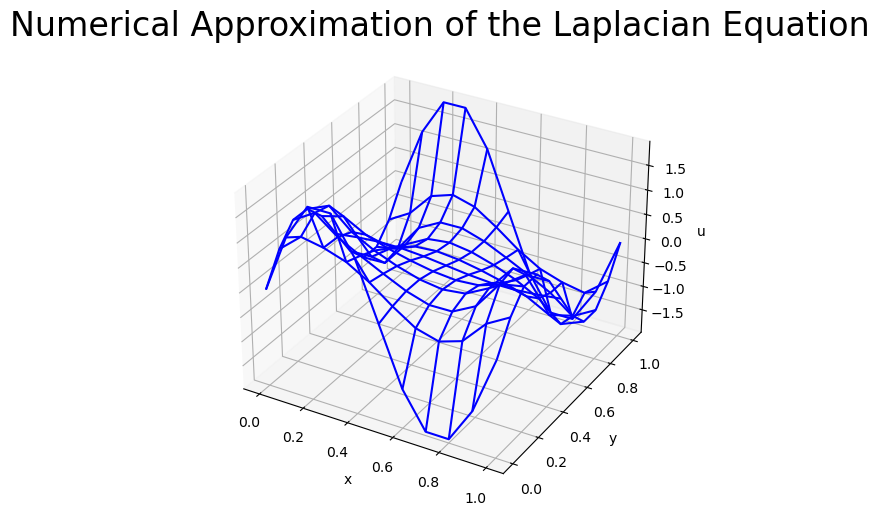

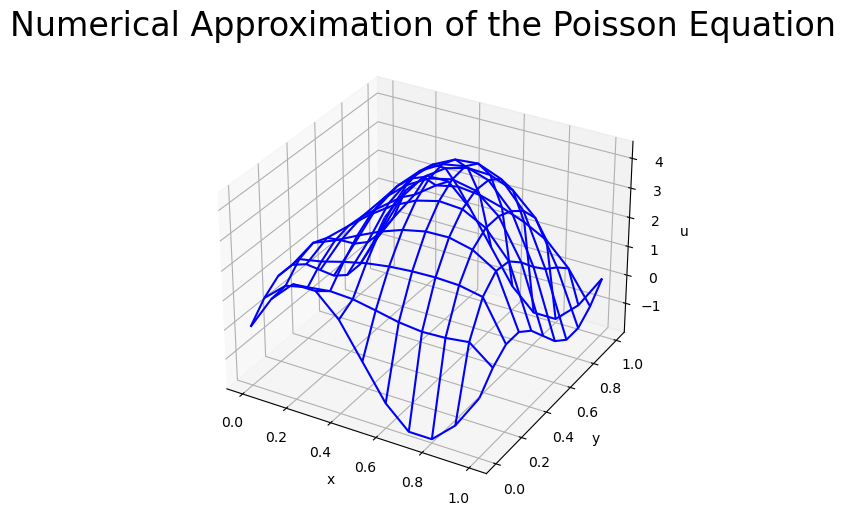

In [87]:
#Laplacian
C=np.dot(Ainv,r1)
u[1:N,1:N]=C.reshape((N-1,N-1))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, u,color='b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.title(r'Numerical Approximation of the Laplacian Equation',fontsize=24,y=1.08)
plt.show()

# Poisson
C2=np.dot(Ainv,r2)
u2[1:N,1:N]=C2.reshape((N-1,N-1))

fig2 = plt.figure(figsize=(8,6))
ax = fig2.add_subplot(111, projection='3d')
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, u2,color='b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08)
plt.show()



## Error Analysis

The errors of these functions can be determined by using the numpy fucntion norm, which calculates the root of squared sum of the elements in each row.
 

In [88]:
error = np.linalg.norm(u)
print('Error (Laplacian) = ', error)

error2 = np.linalg.norm(u2)
print('Error (Poisson) = ', error2)

Error (Laplacian) =  25.676595234851273
Error (Poisson) =  25.676595234851273
